In [1]:
"""#%pip install datasets"""
import ast
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#getdata
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleandata
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\libs\miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#get only data engineering jobs in US
df_DE_US=df[(df['job_title_short']=="Data Engineer") & (df['job_country']=='United States')].copy()
#drop nan values from 'salary_year_avg' col.
#df_DE_US = df_DE_US.dropna(subset=['salary_year_avg'])

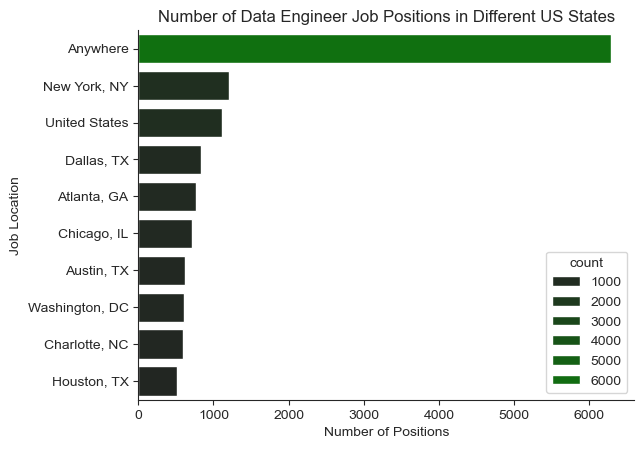

In [3]:
#get job locations of the top 10 places that have offered data engineering work
DE_job_locations=df_DE_US['job_location'].value_counts().head(10).to_frame()

#formatting
sns.set_style('ticks')

#plotting the barplot with seaborn
ax=sns.barplot(data=DE_job_locations, x='count', y='job_location', hue='count', palette='dark:g')
ax.set(xlabel='Number of Positions', ylabel='Job Location')
plt.title("Number of Data Engineer Job Positions in Different US States")

#more formatting
sns.despine()
plt.show()